In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
iris = pd.read_csv('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv')

In [3]:
[col for col in iris.columns] # checking the columns

['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [11]:
feature = ['petal_len', 'sepal_len', 'petal_wid', 'sepal_wid']

# this model doesn't know that there's 3 classes so we will see whether it can figure it out using the data provided
# this is why it is unsupervised machine learning

In [12]:
x = iris[feature]

In [13]:
# starting with a high number of clusters

kmeans_7n = KMeans(n_clusters=7)
y_pred_kmeans_7n = kmeans_7n.fit_predict(x)
print(y_pred_kmeans_7n)

# printing the predictions of the clusering model to make sure their are 7 (results range from 0-6 so 7 clusters in total)

[1 6 6 6 1 1 6 6 6 6 1 6 6 6 1 1 1 1 1 1 1 1 6 1 6 6 1 1 1 6 6 1 1 1 6 6 1
 6 6 1 1 6 6 1 1 6 1 6 1 6 2 2 2 4 2 4 2 3 2 4 3 4 4 2 4 2 4 4 2 4 2 4 2 2
 2 2 2 2 2 3 4 3 4 2 4 2 2 2 4 4 4 2 4 3 4 4 4 2 3 4 5 2 0 5 5 0 4 0 5 0 5
 5 5 2 5 5 5 0 0 2 5 2 0 2 5 0 2 2 5 0 0 0 5 2 2 0 5 5 2 5 5 5 2 5 5 5 2 5
 5 2]


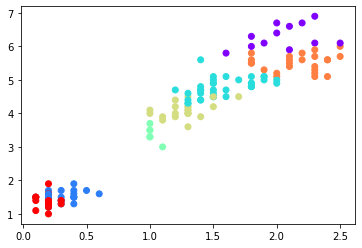

In [38]:
plt.scatter(x['petal_wid'], x['petal_len'], c=y_pred_kmeans_7n, cmap=plt.cm.rainbow)

C:\Users\joe_h\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


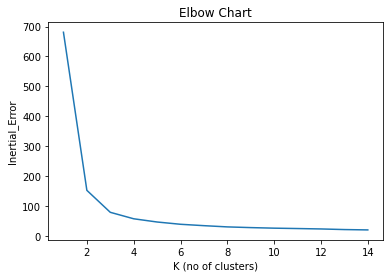

In [35]:
# how to find the best k (number of clusters) to use
# Inertial Error is a measure of the variance

Inertial_Error = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(x)
    Inertial_Error.append(kmeans.inertia_)

plt.plot(range(1, 15), Inertial_Error)
plt.title('Elbow Chart')
plt.xlabel('K (no of clusters)')
plt.ylabel('Inertial_Error')
plt.show()

In [36]:
# the elbow seems to be present at both k=2 and at k=3 - but since we know from the
# K-Nearest Neighbor classifier (other notebook) that there are 3 classes, we will use k=3

kmeans_3n = KMeans(n_clusters=3)
y_pred_kmeans3 = kmeans_3n.fit_predict(x)
print(y_pred_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


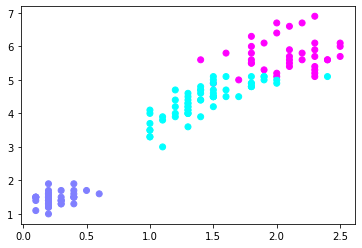

In [37]:
# plotting the clustering for k=3 using only petal width and petal length
plt.scatter(x['petal_wid'], x['petal_len'], c=y_pred_kmeans3, cmap=plt.cm.cool)